# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task_old import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results['x'], results['y'], results['z'])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(30, 350)
plt.draw()
plt.show()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task
import numpy as np


num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import sys
import pandas as pd
from agents.agent import Pilot_Agent
from task import Task
import numpy as np
import csv
from datetime import datetime
import keras
import copy

dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y_%H%M%S")

num_episodes = 2000
runtime = 5.0                                     # time limit of the episode
init_pose = np.array([0.0, 0.0, 5.0, 0.0, 0.0, 0.0])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0.0, 0.0, 10.0])            # target pose
file_output = 'data_'+timestampStr+'.csv'          # file name for saved results


task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
done = False

labels = ['episode', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'reward']
rewards = []  # to store the total reward per episode
maxreward = -10000
maxresults = {x : [] for x in labels}  # to store the trajectory of the best episode

agent = Pilot_Agent(task) 

with open(file_output, 'w', newline='\n', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode, also resets task     
        total_reward = 0
        results = {x : [] for x in labels}  # to store the trajectory of the best episode
        #done = False    

        while True:
            action = agent.act(state) # delivers an action for the current state
            next_state, reward, done = task.step(action) # push the simulation further
            
            agent.step(action, reward, next_state, done)
            
            # store the details of the current episode
            to_write = [i_episode]+[task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v)+ list(action)+[reward]
            writer.writerow(to_write)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])            
                        
            state = next_state
            total_reward += reward    

            if done:
                rewards.append((i_episode, total_reward, task.sim.time)) #keep track of the total reward            
                if total_reward>=maxreward: #save the results of the best run so far
                    maxreward=max(total_reward,maxreward)
                    maxresults = copy.deepcopy(results) #save the best run
                break
    sys.stdout.flush()

Using TensorFlow backend.


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over 
multiple runs. 

### Learning progress (rewards)
The following graph shows the total rewards per episode as a graph. The blue line is a smoothed version and shows the average of the last 10 episodes.

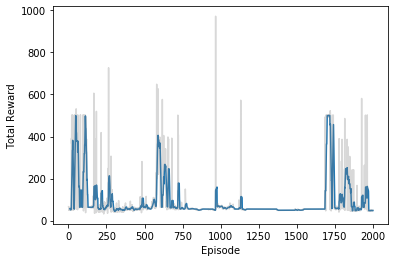

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Source: https://classroom.udacity.com/nanodegrees/nd009-ent/parts/80594ce0-6c97-4c9b-9158-08e626ee2215/modules/c0d4a29a-d82e-454c-9bb6-c517a652632d/lessons/b2eb26c6-49bb-43fa-9810-45021cc786d5/concepts/d0806599-a169-41ab-ae31-5bcbf848f091
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

eps, rews, duration = np.array(rewards).T
smoothed_rews = running_mean(rews, 10)
smoothed_dur = running_mean(duration, 10)

plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)

plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.draw()
plt.show()


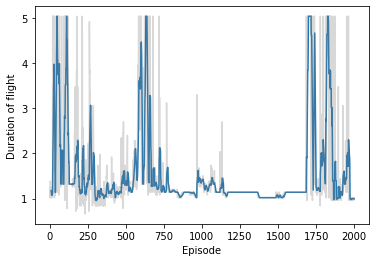

In [3]:
plt.plot(eps[-len(smoothed_dur):], smoothed_dur)
plt.plot(eps, duration, color='grey', alpha=0.3)

plt.xlabel('Episode')
plt.ylabel('Duration of flight')
plt.draw()
plt.show()

### 3D trajectory of the best run

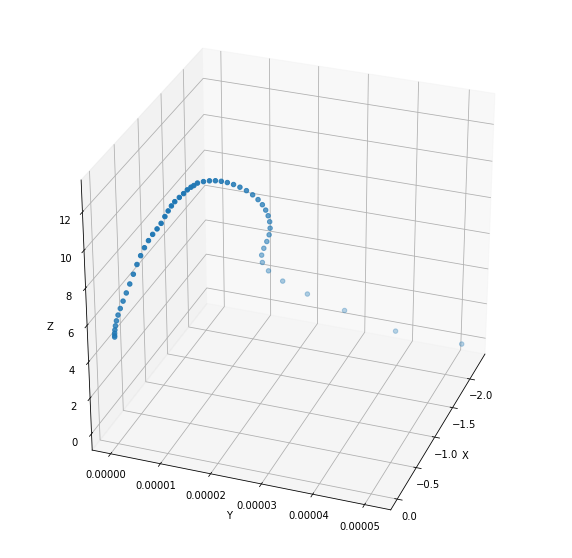

In [4]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

def plot_trajectory(results):
    fig2 = plt.figure(figsize=(10, 10))
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.scatter(results['x'], results['y'], results['z'])

    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    ax2.view_init(30, 20)
    plt.draw()
    plt.show()
plot_trajectory(maxresults)

### Detailed metrics of the best run

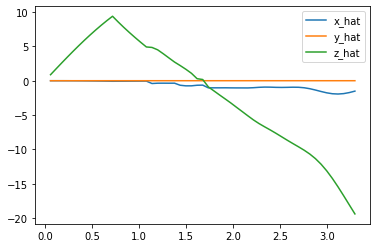

In [5]:
plt.plot(maxresults['time'], maxresults['x_velocity'], label='x_hat')
plt.plot(maxresults['time'], maxresults['y_velocity'], label='y_hat')
plt.plot(maxresults['time'], maxresults['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

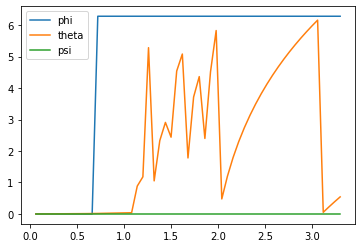

In [6]:
plt.plot(maxresults['time'], maxresults['phi'], label='phi')
plt.plot(maxresults['time'], maxresults['theta'], label='theta')
plt.plot(maxresults['time'], maxresults['psi'], label='psi')
plt.legend()
_ = plt.ylim()

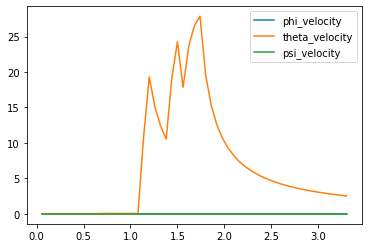

In [7]:
plt.plot(maxresults['time'], maxresults['phi_velocity'], label='phi_velocity')
plt.plot(maxresults['time'], maxresults['theta_velocity'], label='theta_velocity')
plt.plot(maxresults['time'], maxresults['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

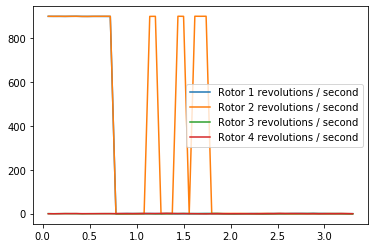

In [8]:
plt.plot(maxresults['time'], maxresults['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(maxresults['time'], maxresults['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(maxresults['time'], maxresults['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(maxresults['time'], maxresults['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)
exit()

[-0.69655478  3.83648137  0.          1.2912773   5.29225494  0.        ]
[  0.10189468   8.89578435 -11.4734795 ]
[20.07612164 28.8124159   0.        ]


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
The task of the quadcopter is to take off from the coordinates (0,0,5) and fly to the pose (0,0,10).
The reward function has to reward when the agent flies closer to the target pose and it has to penalize if the agent stays away too far. I am using the L1 norm as part of the reward function; it will reward the agent if it flies closer to the target and penalize it if it stays away. The closer it comes, the more reward it will receive in each step.

The L1 norm has two drawbacks:
- it can become arbitrarily large, which might cause numerical difficulties when I use it in a deep learning setting (vanishing gradients)
- it is only positive, so the agent always gets rewarded, which might lead it to just fly around and not really quickly approach the target pose.

To overcome these drawbacks, the L1 norm is transformed like this `np.tanh(1 - 0.003*(l1_distance))` . This way, the reward is always between -1 and 1, and if the quadcopter is far from the target pose, each move will be penalized. But the reward function always has a nice gradient, so the agent always knows in which direction to move to maximize the reward.

Here is the plot of the distance reward function:


(Source: https://www.wolframalpha.com/input/?i=plot+tanh%281+-+0.003*x%29)

I also tried the L2 norm as a distance metric, but it failed to perform nicely. I only saw limited learning progress with the agent. A deeper investigation is needed why the L1 reward function performs so nicely and the L2 reward function is not suitable.

*Lessons learned:*
- critic neural networks with only one layer for states or actions and actor neural networks with only one layer don't seem to capture the complexity too well. I did not see much learning progress for those configurations. Therefore, I ended 

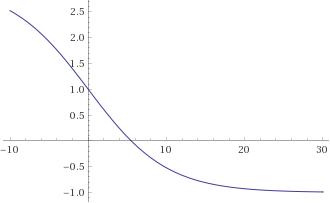
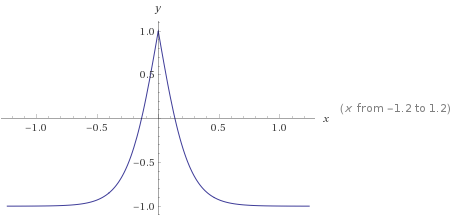

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I tried the two learning algorithms:
- Random Policy Search (linear model)
- DDPG

The random policy search (linear model) did not perform satisfactorily, as expected. It basically led to the crash of the quadcopter, i.e. the aircraft could not support a sustained flight. Please see workbook Quadcopter_Project_linearmodel.ipynb for details.

DDPG worked pretty well, so I will explain it in further detail in the following paragraphs. The learning algorithm has the following tunable parameters:
- parameters of learning process: no. of episodes, runtime
- parameters of noise process: $\mu$, $\sigma$, $\theta$
- parameters of DDPG agent: $\gamma$, $\tau$
- parameters of replay buffer: batch size, buffer size
- parameters of neural network: learning rate 

- $\mu$, $\sigma$, $\theta$, $\gamma$, $\tau$, batch size, basic_reward, l2 reward, tilt reward, network, qualitative result 

I first used the original network model with original parameters as specified in the Udacity sample code. This did not work so well. After ca. 1000 episodes, the agent was as smart as it would ever be. Most flights lasted shorter than 2 seconds, so the 5 second runtime is more than sufficient. I did some training runs to investigate the best settings; here are my lessons learned:
- most of the time, the agent could not hold the quadcopter in the air; it basically just fell downward like a leaf and was shaking heavily. Not even the rotors were running most of the time. 
- changing the noise process parameters seemed to help with the learning, but it was only a very minor effect, and if the noise became too much, the agent showed erratic behaviour.

In the end, I used the configuration suggested in Lillicrap, Timothy P., et al., 2015. Continuous Control with Deep Reinforcement Learning on page 11 ([Link to PDF file](https://arxiv.org/pdf/1509.02971.pdf)). 

Here is the new network model with optimized parameters:
- parameters of learning process: 
 - no. of episodes: 2000
 - runtime: 5.0
- parameters of noise process: 
 - $\mu=0$ 
 - $\sigma=0.2$
 - $\theta=0.15$
- parameters of DDPG agent: 
 - $\gamma=0.99$
 - $\tau=0.001$
- parameters of replay buffer: 
 - batch size=64
 - buffer size=1000000
- parameters of neural network: 
 - learning rate=0.001 for Adam optimizer. ( A learning rate of 0.0001 did not yield any visible learning progress).

I did some training runs to investigate the best settings; here are my lessons learned:
- agent learns successfully after >1500 episodes: using L1 norm in reward function, no dropout in actor network nor critic network. 
- using the l2 norm reward function, and with dropout in initial layer for actor network, the learning rate is much lower than initially, but still heavy reward peaks.
- using the l2 norm and no dropout in initial layer for actor network, I saw pretty small but steady learning behaviour.
- using learning rate=0.001, no dropout in initial layer for actor network, l1 norm reward function, I saw very good learning behaviour of the agent.
- the agent behaviour (and the learning progress)  is depending on a finely tuned reward function. It has to have the right scale and shape; even small variations lead to visibly worse outcomes.

The neural network architecture looks as follows:
- Actor:
 - layers: 1x input layer, 2x hidden dense layers, output layer
 - sizes: hidden layers with 400,300 units
 - ReLU as activation function for hidden layers
 - Sigmoid activation function for output layer (to encode actions)
 - After each hidden layer, I introduced a BatchNormalization layer.
 - Each hidden layer featured a kernel regularizer to reign in model complexity.
 - no dropout layers were used, as they did not prove helpful.
- Critic: the neural network looks identical to the actor network, except for the actions/states split.

The replay buffer was set at $1*10^6$ elements ( up from $1*10^5$ elements given in the original Udacity source code). This setting is also based on the Lillicrap et al. paper.



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
It was a very hard task to learn; the original network configuration with three hidden layers with 32, 64,32 units for the actor was not able to learn it properly, but instead, the task required a much bigger network and more than 1500 training episodes to start learning effectively.

There was an aha moment at around 1500 episodes from which on the agent almost continuously scored maximum points. Obviously, the networks need some minimum input and some exploration time before they can settle in a good policy.

Final performance: TODO

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
The hardest part of the project was to find the right neural network architecture and hyperparameters. It turns out that the neural network architecture has the largest impact on the performance of the agent, much more important than the parameters of the DDPG or the noise process and even more important than the reward function. If the neural network is unsuitable, the agent will never learn, even if the reward function is fine. Tuning the reward function is another very hard task because the range of suitable functions is pretty small. If you hit the window, the agent will behave nicely; if you miss it, the agent will show more or less chaotic behaviour and the policy does not converge.

Even if the reward function facilitates agent learning behaviour, it still does not seem to be able to hover at a certain spot, but fly around more or less. Sometimes, I would like to be able to add some rules to the policy which clearly define a certain behaviour in a specific situation (e.g. when in pose xyz and in upright position and close to the target pose, then spin rotors evenly at k RPM)

Even with very similar parameter settings, the quality of the learned policy can vary wildly during and at the end of the training episodes. Even though the agent can exhibit very good behaviour during the training episodes, it is not guaranteed that it will end up with the best policy after the last training episode.

I found a peculiar situation: the agent tries negative rotor speeds, as the noise process can yield negative numbers. The trained actor network only outputs rotor speeds >=0, but adding noise to it makes it negative which is a physical impossibility. The physics sim covers this edge case correctly, but it would have been good to point it out in the description.

